In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [6]:
train.columns.tolist()

['ID',
 'Age',
 'Gender',
 'Education_Status',
 'Employment_Status',
 'Working_Week (Yearly)',
 'Industry_Status',
 'Occupation_Status',
 'Race',
 'Hispanic_Origin',
 'Martial_Status',
 'Household_Status',
 'Household_Summary',
 'Citizenship',
 'Birth_Country',
 'Birth_Country (Father)',
 'Birth_Country (Mother)',
 'Tax_Status',
 'Gains',
 'Losses',
 'Dividends',
 'Income_Status',
 'Income']

In [7]:
test.columns.tolist()

['ID',
 'Age',
 'Gender',
 'Education_Status',
 'Employment_Status',
 'Working_Week (Yearly)',
 'Industry_Status',
 'Occupation_Status',
 'Race',
 'Hispanic_Origin',
 'Martial_Status',
 'Household_Status',
 'Household_Summary',
 'Citizenship',
 'Birth_Country',
 'Birth_Country (Father)',
 'Birth_Country (Mother)',
 'Tax_Status',
 'Gains',
 'Losses',
 'Dividends',
 'Income_Status']

In [9]:
train['Education_Status'].unique()

array(['Middle (7-8)', 'Associates degree (Vocational)', 'High graduate',
       'Masters degree', 'Bachelors degree', 'High Freshman',
       'Elementary (1-4)', 'College', 'Children', 'High Sophomore',
       'Associates degree (Academic)', 'High Junior', 'Elementary (5-6)',
       'Doctorate degree', 'Professional degree', 'High Senior',
       'Kindergarten'], dtype=object)

In [10]:
train['Working_Week (Yearly)'].unique()

array([ 4, 52, 50,  0,  5, 30, 40, 20, 14,  6, 12, 48, 26, 44, 42, 46, 36,
       49, 45, 28, 35,  2,  8, 24, 15, 25, 16, 38, 22, 23, 43, 32, 17, 51,
       37, 13, 11, 47, 21,  1, 29, 10, 18, 39,  7, 34, 41,  9, 27,  3, 19,
       33, 31], dtype=int64)

In [12]:
train['Employment_Status'].unique()
# Full-Time, Children or Armed Forces, Not working, Seeking Full-Time, 
# Choice Part-Time, Part-Time (Usually Part-Time), Part-Time (Usually Full-Time),
# Seeking Part-Time

array(['Full-Time', 'Children or Armed Forces', 'Not Working',
       'Seeking Full-Time', 'Choice Part-Time',
       'Part-Time (Usually Part-Time)', 'Part-Time (Usually Full-Time)',
       'Seeking Part-Time'], dtype=object)

In [13]:
train['Industry_Status'].unique()

array(['Social Services', 'Entertainment', 'Manufacturing (Non-durable)',
       'Retail', 'Not in universe or children', 'Construction',
       'Hospitals', 'Manufacturing (Durable)', 'Public Administration',
       'Education', 'Finance Insurance & Real Estate', 'Transportation',
       'Medical (except Hospitals)', 'Wholesale',
       'Other professional services',
       'Personal Services (except Private Household)',
       'Business & Repair', 'Private Household Services', 'Mining',
       'Agriculture', 'Utilities & Sanitary', 'Communications',
       'Forestry & Fisheries', 'Armed Forces'], dtype=object)

#### Income(target) 분포 보기

(array([1.585e+04, 3.549e+03, 4.840e+02, 4.800e+01, 1.700e+01, 1.300e+01,
        1.500e+01, 7.000e+00, 9.000e+00, 8.000e+00]),
 array([   0. ,  999.9, 1999.8, 2999.7, 3999.6, 4999.5, 5999.4, 6999.3,
        7999.2, 8999.1, 9999. ]),
 <BarContainer object of 10 artists>)

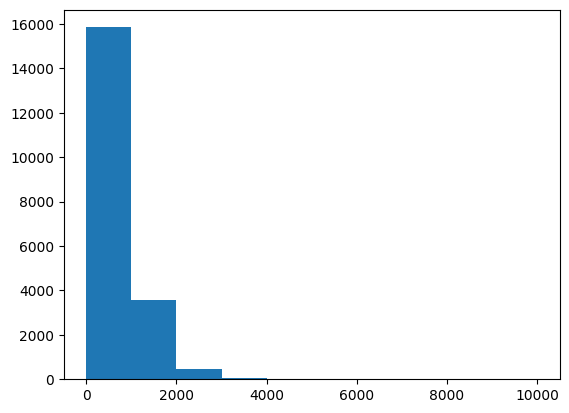

In [16]:
target = train['Income']
plt.hist(target)

In [17]:
target.value_counts()

0       8697
500      743
700      550
600      547
800      526
        ... 
543        1
1713       1
1602       1
1722       1
2373       1
Name: Income, Length: 1228, dtype: int64